# Graphs in ML - Project Notebook
###### Valentin Berkes, Simon Lebastard

In this notebook we will create several strongly and weakly connected graphs, test the Exp3G algorithm and assess the influence of a qualitative change in the connectivity graph on the evolution of regret.

In [31]:
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import write_dot
from networkx.algorithms.approximation import *
from EXP3 import EXP3, EXP3Opt, compute_regret, plot_regret, gaussian_filter, upper_bound
import arms
import numpy as np
import obsGraph
import pdb

obs_dict = {0:"unobservable", 1:"weakly observable", 2:"strongly observable"}

In [2]:
G = nx.DiGraph()
G.add_node(0, arm=arms.ArmBernoulli(0.5))
G.add_node(1, arm=arms.ArmBernoulli(0.3))
G.add_node(2, arm=arms.ArmBernoulli(0.4))
G.add_node(3, arm=arms.ArmBernoulli(0.7))
G.add_edge(0,0)
G.add_edge(0,1)
G.add_edge(2,2)
G.add_edge(3,3)

G = nx.convert_node_labels_to_integers(G)

/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

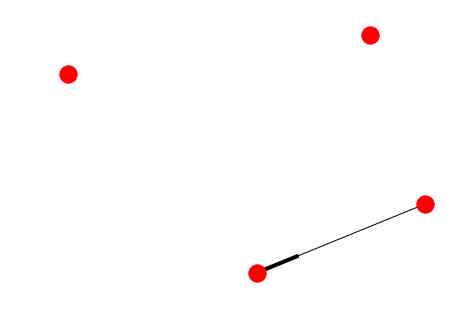

In [3]:
import matplotlib.pyplot as plt
nx.draw(G)  # networkx draw()
plt.draw()
plt.show()

In [4]:
## Get nice graphs with self-loops in PNG format
# 1) Install pygraphviz
# 2) Run:
write_dot(G,'graph.dot')
# 3) In terminal, run: dot -Tpng graph.dot > graph.png

We will run the Exp3G algorithm 50 times and produce an average to have a smooth regret function. This will allow us to detect quasi-linear components and better identify the asymptotic regret. Note that quasi-linear components can be used on a transformed regret:
- $x \mapsto \sqrt{x}$ would allow us to find the areas where the regret behaves as $\mathcal{O}(\sqrt{x})$
- $x \mapsto x^{\frac{2}{3}}$ would allow us to find the areas where the regret behaves as $\mathcal{O}(x^{\frac{2}{3}})$

In [9]:
n_itr = 5000
n_sim = 50

# q,losses = EXP3(G, list(G.nodes()), 0.5, 0.05, n_itr, n_sim)
q,losses = EXP3Opt(G, list(G.nodes()), n_itr, n_sim)


Simulating EXP3 on 50 runs:  44%|████▍     | 22/50 [00:03<00:04,  6.10it/s]
Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/proprietaire/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/proprietaire/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/proprietaire/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Simulating EXP3 on 50 runs: 100%|██████████| 50/50 [00:07<00:00,  6.39it/s]


In [10]:
regret = compute_regret(losses, G)

Fitting power functions is still experimental, but it will allow us to track changes in regret trends when it fully works.
Note that we could better fit by knowing the independence number $\alpha(G)$ for strongly connected graphs, or the weak domination number $\delta(G)$ for weakly connected graphs. Determining those values is NP-hard, so no scalable method will be available, but there are some algorithms for computing approximations for small graphs. See for instance (Fox & Pach)

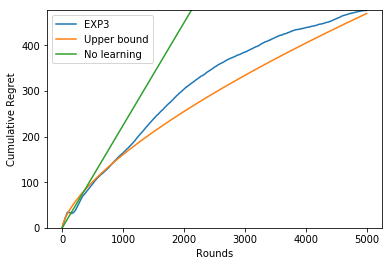

In [11]:
der2,linAreas = plot_regret(G, [regret, upper_bound(G, len(regret))], ['EXP3', 'Upper bound'])#, reg="Pwr2/3", stdev=34)
# der2,linAreas = plot_regret([regret], ['EXP3'])

Second derivative can be plotted to figure out the thresholds to use for fitting linear and power curves

In [9]:
#plt.plot(range(10,4700), der2[10:4700])
#plt.show()

## Building strongly connected graphs

To generate a class of strongly connected graphs, we use a parametric method that proceeds as follows:
- A fully connected graph $\mathcal{G}$ is created
- $\alpha \in [0,1]$ specifies the rate of self-edges to be removed from $\mathcal{G}$
- $\beta \in [0,1]$ parametrises the rate of peer-edges to be removed, according to the following policy: if we decide to remove peer-edges for a node $i$ then there is a uniform probability distribution over the number of peer-edges to remove.

Even though this method does allow to generate only a given class of graphs, we can later generalize it by introducing a third parameter $p$ that would be the probability distribution to replace the uniform distribution in the case where peer-edges are removed.

Here is an example of a strongly connected graph created through our function:

In [27]:
alpha1 = 0.5
beta1 = 0.5
n_nodes = 5
H1 = obsGraph.strong_obs_graph(n_nodes, alpha1, beta1)

/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

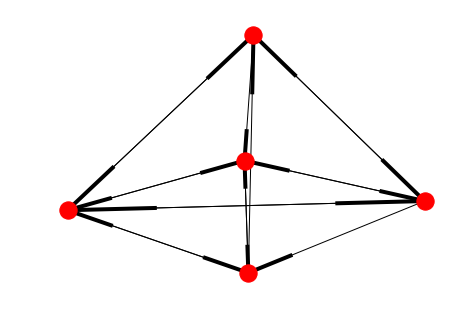

In [28]:
nx.draw(H1)  # networkx draw()
plt.draw()
plt.show()
write_dot(H1,'strong1.dot')

In [32]:
print("This graph is {}".format(obs_dict[obsGraph.observability_type(H1)]))

This graph is strongly observable


In [33]:
obsGraph.strong_nodes(H1)

{'dual': [], 'peer': [0, 2], 'self': [1, 3, 4]}

Function obsGraph.strong_nodes provides the list of nodes in a graph that are strongly observable.
Those nodes are either observed by themselves ('self'-observed), by all other edges ('peer-observed') or by both ('dual'-observed).

Note that in this case, we chose $\alpha + \beta = 1$, resulting in edges removed for all nodes (either self-edge, or one or more peer-edges).

In the second example below, some edges are left dual:

/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

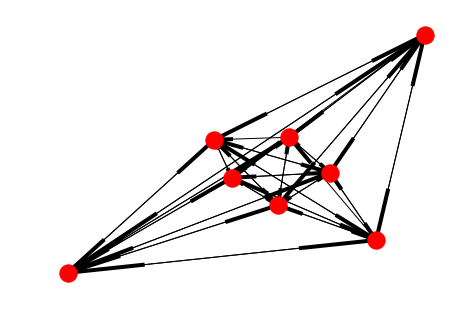

This graph is strongly observable


{'dual': [0, 6], 'peer': [1, 5, 7], 'self': [2, 3, 4]}

In [35]:
alpha2 = 0.4
beta2 = 0.3
n_nodes = 8
H2 = obsGraph.strong_obs_graph(n_nodes, alpha2, beta2)
nx.draw(H2)  # networkx draw()
plt.draw()
plt.show()
#write_dot(H2,'strong2.dot')
print("This graph is {}".format(obs_dict[obsGraph.observability_type(H2)]))
obsGraph.strong_nodes(H2)

# Examples
## Strongly observable
### Bandit

In [38]:
bandit = nx.DiGraph()
bandit.add_node(0, arm=arms.ArmBernoulli(0.5))
bandit.add_node(1, arm=arms.ArmBernoulli(0.3))
bandit.add_node(2, arm=arms.ArmBernoulli(0.4))
bandit.add_node(3, arm=arms.ArmBernoulli(0.7))
bandit.add_node(4, arm=arms.ArmBernoulli(0.1))
bandit.add_edge(0,0)
bandit.add_edge(1,1)
bandit.add_edge(2,2)
bandit.add_edge(3,3)
bandit.add_edge(4,4)
print("This graph is {}".format(obs_dict[obsGraph.observability_type(bandit)]))

This graph is strongly observable


/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

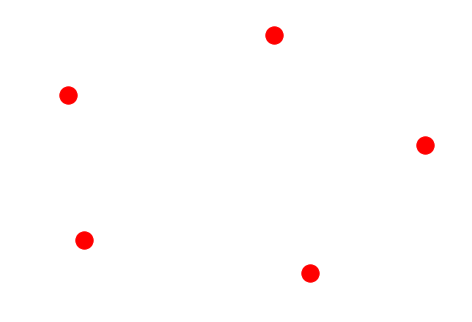

In [39]:
nx.draw(bandit)
plt.draw()
plt.show()
# Note that networkx does not display self edges
# Exporting the dot graph allows to see self-edges

In [41]:
n_itr = 5000
n_sim = 50
bandit_q, bandit_losses = EXP3Opt(bandit, list(bandit.nodes()), n_itr, n_sim, alpha=1)
bandit_regret = compute_regret(bandit_losses, bandit)

Simulating EXP3 on 50 runs: 100%|██████████| 50/50 [00:07<00:00,  6.86it/s]


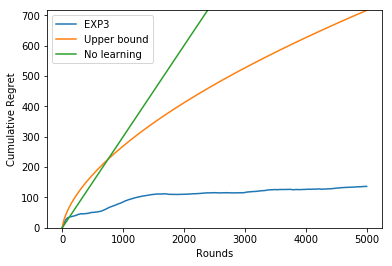

([], [])

In [42]:
plot_regret(bandit, [bandit_regret, upper_bound(bandit, len(bandit_regret), alpha=1)], ['EXP3', 'Upper bound'])

In [43]:
bandit_q

array([  2.63423825e-02,   9.50466682e-07,   1.42399084e-02,
         9.59416759e-01,   1.33823559e-36])

independent set np hard
https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.approximation.html?highlight=independent%20set#module-networkx.algorithms.approximation.independent_set

how to compute weak domination number?

regret doit être une esperance: il faut lancer plusieurs fois et faire la moyenne

### Full feedback

In [44]:
graph_arms = [arms.ArmBernoulli(0.5), arms.ArmBernoulli(0.3), arms.ArmBernoulli(0.4), arms.ArmBernoulli(0.7), arms.ArmBernoulli(0.1)]
full_feedback = obsGraph.strong_obs_graph(5, 0, 0, graph_arms)
print("This graph is {}".format(obs_dict[obsGraph.observability_type(full_feedback)]))

This graph is strongly observable


/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

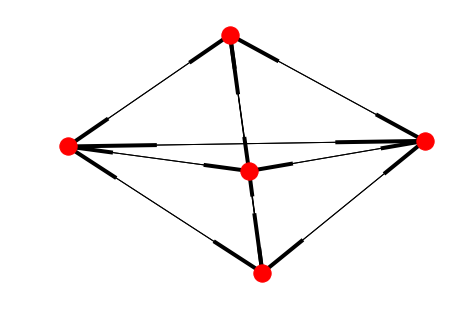

In [45]:
nx.draw(full_feedback)  # networkx draw()
plt.draw()
plt.show()

In [76]:
n_itr = 10000
n_sim = 50
full_feedback_q, full_feedback_losses = EXP3Opt(full_feedback, list(full_feedback.nodes()), n_itr, n_sim, alpha=1)
full_feedback_regret = compute_regret(full_feedback_losses, full_feedback)

Simulating EXP3 on 50 runs: 100%|██████████| 50/50 [00:28<00:00,  1.75it/s]


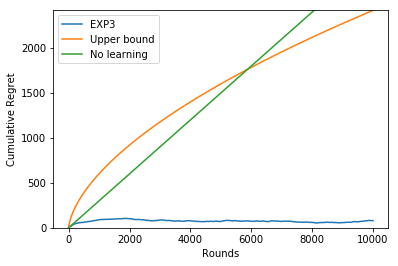

([], [])

In [77]:
plot_regret(full_feedback, [full_feedback_regret, upper_bound(full_feedback, len(full_feedback_regret), alpha=len(full_feedback.nodes()))], ['EXP3', 'Upper bound'])

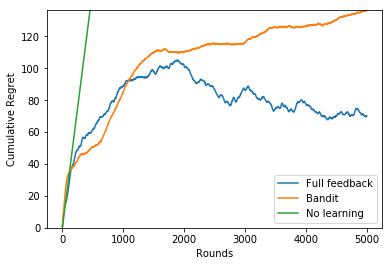

([], [])

In [78]:
min_t = min(len(full_feedback_regret), len(bandit_regret))
plot_regret(full_feedback, [full_feedback_regret[:min_t], bandit_regret[:min_t]], ['Full feedback', 'Bandit'])

### Police officer - loopless clique

In [84]:
graph_arms = [arms.ArmBernoulli(0.5), arms.ArmBernoulli(0.3), arms.ArmBernoulli(0.4), arms.ArmBernoulli(0.7), arms.ArmBernoulli(0.1)]
police = obsGraph.strong_obs_graph(5, 1, 0, graph_arms)
print("This graph is {}".format(obs_dict[obsGraph.observability_type(police)]))

This graph is strongly observable


/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

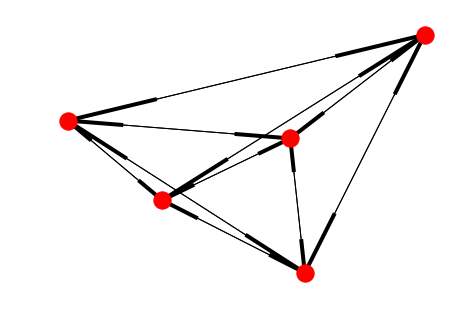

In [80]:
nx.draw(police)  # networkx draw()
plt.draw()
plt.show()

In [82]:
n_itr = 10000
n_sim= 30
police_q, police_losses = EXP3Opt(police, list(police.nodes()), n_itr, n_sim, alpha=1)
police_regret = compute_regret(police_losses, police)

Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:13<00:00,  2.15it/s]


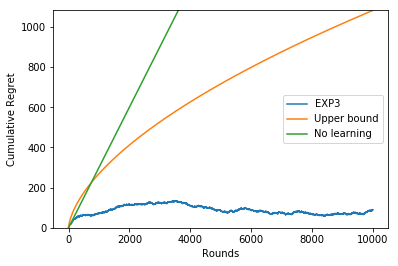

([], [])

In [83]:
plot_regret(police, [police_regret, upper_bound(police, len(police_regret))], ['EXP3', 'Upper bound'])

In [ ]:
min_t = min(len(full_feedback_regret), min(len(bandit_regret),len(police_regret)))
plot_regret(police, [full_feedback_regret[:min_t], bandit_regret[:min_t], police_regret[:min_t]], ['Full feedback', 'Bandit', 'Police'])

## Weakly observable

### Revealing actions

In [85]:
revealing = nx.DiGraph()
revealing.add_node(0, arm=arms.ArmBernoulli(0.5))
revealing.add_node(1, arm=arms.ArmBernoulli(0.3))
revealing.add_node(2, arm=arms.ArmBernoulli(0.4))
revealing.add_node(3, arm=arms.ArmBernoulli(0.7))
revealing.add_node(4, arm=arms.ArmBernoulli(0.1))
revealing.add_edge(0,0)
revealing.add_edge(0,1)
revealing.add_edge(0,2)
revealing.add_edge(0,3)
revealing.add_edge(0,4)
print("This graph is {}".format(obs_dict[obsGraph.observability_type(revealing)]))

This graph is weakly observable


/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

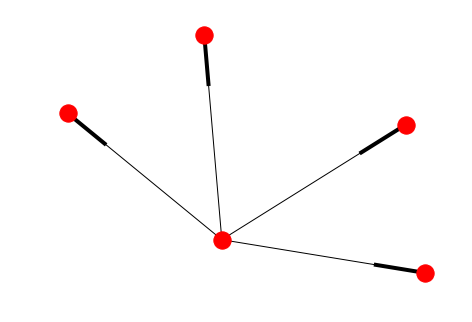

In [86]:
nx.draw(revealing)  # networkx draw()
plt.draw()
plt.show()

In [87]:
n_itr = 20000
n_sim = 30
revealing_q, revealing_losses = EXP3Opt(revealing, list(revealing.nodes()), n_itr, n_sim, delta=1)
revealing_regret = compute_regret(revealing_losses, revealing)

Simulating EXP3 on 10 runs: 100%|██████████| 10/10 [00:10<00:00,  1.07s/it]


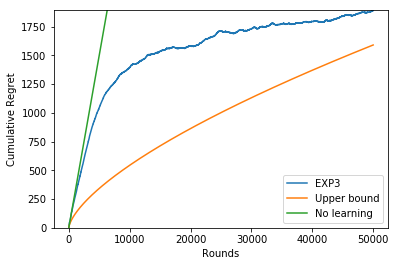

([], [])

In [88]:
plot_regret(revealing, [revealing_regret, upper_bound(revealing, len(revealing_regret))], ['EXP3', 'Upper bound'])

In [89]:
min_t = min(min(len(revealing_regret),len(full_feedback_regret)), min(len(bandit_regret),len(police_regret)))

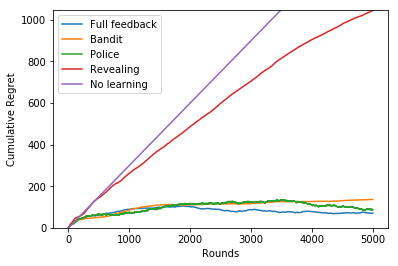

([], [])

In [90]:
plot_regret(revealing, [full_feedback_regret[:min_t], bandit_regret[:min_t], police_regret[:min_t], revealing_regret[:min_t]], ['Full feedback', 'Bandit', 'Police','Revealing'])

## Unobservable

In [93]:
peer_reveal = revealing.copy()
peer_reveal.remove_edge(0,0)

print("This graph is {}".format(obs_dict[obsGraph.observability_type(peer_reveal)]))

n_itr = 20000
n_sim = 30
peer_reveal_q, peer_reveal_losses = EXP3Opt(peer_reveal, list(peer_reveal.nodes()), n_itr, n_sim, delta=1)
peer_reveal_regret = compute_regret(peer_reveal_losses, peer_reveal)

Simulating EXP3 on 30 runs:   0%|          | 0/30 [00:00<?, ?it/s]

This graph is unobservable


Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:12<00:00,  2.44it/s]


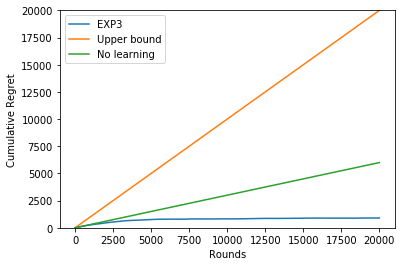

([], [])

In [94]:
plot_regret(peer_reveal, [peer_reveal_regret, upper_bound(peer_reveal, len(peer_reveal_regret))], ['EXP3', 'Upper bound'])

# Instability

## Strongly to weakly

Here we will build a strongly connected graph, run Exp3G on this graph but break the strong connectivity while the algorithm runs.
Let's start simple with 5 nodes

### 1) Loopless clique (police) graph

Here we will look at the behavior of a perturbed police graph.

In [95]:
S1 = police.copy()

/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

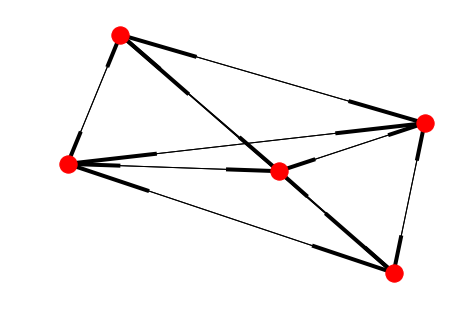

In [96]:
nx.draw(S1)  # networkx draw()
plt.draw()
plt.show()

In [97]:
n_itr = 20000
n_sim = 30

print("This graph is {}".format(obs_dict[obsGraph.observability_type(S1)]))

alphaS1 = S1.number_of_edges()

deltaS1 = S1.number_of_edges()

This graph is strongly observable



Simulating EXP3 on 30 runs:   7%|▋         | 2/30 [00:02<00:30,  1.11s/it]
Exception in thread Thread-31:
Traceback (most recent call last):
  File "/home/proprietaire/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/proprietaire/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/proprietaire/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:31<00:00,  1.04s/it]


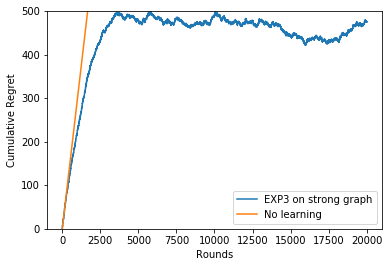

In [99]:
qS1,lS1 = EXP3Opt(S1, list(S1.nodes()), n_itr, n_sim, alpha=alphaS1, delta = deltaS1)
regS1 = compute_regret(lS1, S1)
dr2S1,laS1 = plot_regret(S1, [regS1], ['EXP3 on strong graph'])

Simulating EXP3 on 30 runs:   0%|          | 0/30 [00:00<?, ?it/s]

Edge (4, 3) removed
G is now weakly observable
1 edges were removed
This graph is weakly observable


Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:28<00:00,  1.06it/s]


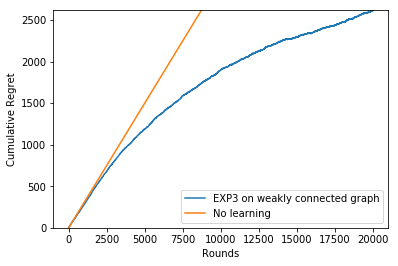

In [101]:
perturbations = [(0,1),(0,2),(0,3),(0,4)
                ,(1,0),(1,2),(1,3),(1,4)
                ,(2,0),(2,1),(2,3),(2,4)
                ,(3,0),(3,1),(3,2),(3,4)
                ,(4,0),(4,1),(4,2),(4,3)]

W1_1 = obsGraph.remove_edges(S1, perturbations, 1)
print("This graph is {}".format(obs_dict[obsGraph.observability_type(W1_1)]))

qW1_1,lW1_1 = EXP3Opt(W1_1, list(W1_1.nodes()), n_itr, n_sim, alpha = alphaS1, delta = deltaS1)
regW1_1 = compute_regret(lW1_1, W1_1)
dr2W1_1,laW1_1 = plot_regret(W1_1, [regW1_1], ['EXP3 on weakly connected graph'])

Simulating EXP3 on 30 runs:   0%|          | 0/30 [00:00<?, ?it/s]

Edge (4, 3) removed
G is now weakly observable
4 edges were removed
This graph is weakly observable


Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:25<00:00,  1.19it/s]


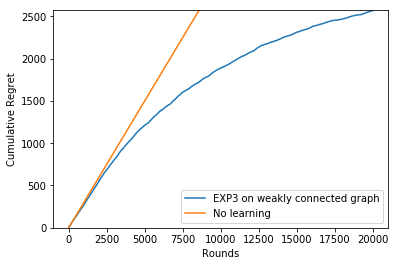

In [102]:
W1_4 = obsGraph.remove_edges(S1, perturbations, 4)
print("This graph is {}".format(obs_dict[obsGraph.observability_type(W1_4)]))

qW1_4,lW1_4 = EXP3Opt(W1_4, list(W1_4.nodes()), n_itr, n_sim, alpha = alphaS1, delta = deltaS1)
regW1_4 = compute_regret(lW1_4, W1_4)
dr2W1_4,laW1_4 = plot_regret(W1_4, [regW1_4], ['EXP3 on weakly connected graph'])

Above we run the experiment of removing at first one edge from 0, turning the police graph into a weakly observable graph. Second, we remove other edges leaving zero, without further changing the nature of the observability graph. What happens is that because the learning speed only depends on the nature of the learning graph and, for weakly observable graphs, on $\delta$, furher removing edges from the observability graph without making it unobservable or altering the weak domination number does not change the speed of learning.

### 2) Weakened fully connected graph, impact of $\delta$

Here we will remove "peer"-edges from a weakened fully connected graph such that the resulting graph stays weakly observable, but such that its weak domination number is impacted:

In [121]:
perturbations_FF = [(1,0),(2,0),(3,0),(4,0),(0,1)
                ,(2,1),(3,1),(4,1),(1,2)
                ,(0,2),(3,2),(4,2),(2,3)
                ,(0,3),(1,3),(4,3),(3,4)
                ,(0,4),(1,4),(2,4)]

S2 = full_feedback.copy()
S2.remove_edge(4,4)
S2.remove_edge(3,4)
print("S2 is {}".format(obs_dict[obsGraph.observability_type(S2)]))

alphaS2 = 1
deltaS2 = 1

W2_5 = obsGraph.remove_edges(S2, perturbations_FF, 5)
W2_9 = obsGraph.remove_edges(S2, perturbations_FF, 9)
W2_13 = obsGraph.remove_edges(S2, perturbations_FF, 13)
W2_17 = obsGraph.remove_edges(S2, perturbations_FF, 17)

print("W2_5 is {}".format(obs_dict[obsGraph.observability_type(W2_5)]))
print("W2_9 is {}".format(obs_dict[obsGraph.observability_type(W2_9)]))
print("W2_13 is {}".format(obs_dict[obsGraph.observability_type(W2_13)]))
print("W2_17 is {}".format(obs_dict[obsGraph.observability_type(W2_17)]))

S2 is weakly observable
Edge (2, 4) removed
G is now weakly observable
5 edges were removed
Edge (2, 4) removed
G is now weakly observable
9 edges were removed
Edge (2, 4) removed
G is now weakly observable
13 edges were removed
Edge (2, 4) removed
G is now weakly observable
17 edges were removed
W2_5 is weakly observable
W2_9 is weakly observable
W2_13 is weakly observable
W2_17 is weakly observable


Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:12<00:00,  2.33it/s]


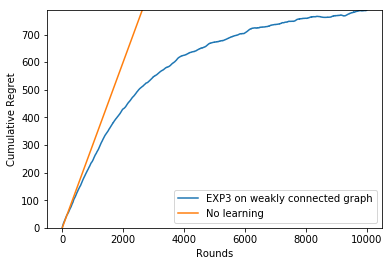

In [122]:
n_itr = 10000
n_sim = 30

qW2_5,lW2_5 = EXP3Opt(W2_5, list(W2_5.nodes()), n_itr, n_sim, alpha = alphaS2, delta = 2)
regW2_5 = compute_regret(lW2_5, W2_5)
dr2W2_5,laW2_5 = plot_regret(W2_5, [regW2_5], ['EXP3 on weakly connected graph'])

Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:10<00:00,  2.73it/s]


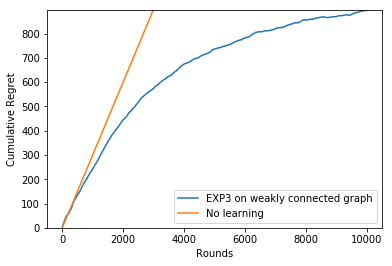

In [123]:
qW2_9,lW2_9 = EXP3Opt(W2_9, list(W2_9.nodes()), n_itr, n_sim, alpha = alphaS2, delta = 3)
regW2_9 = compute_regret(lW2_9, W2_9)
dr2W2_9,laW2_9 = plot_regret(W2_9, [regW2_9], ['EXP3 on weakly connected graph'])

Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:10<00:00,  2.79it/s]


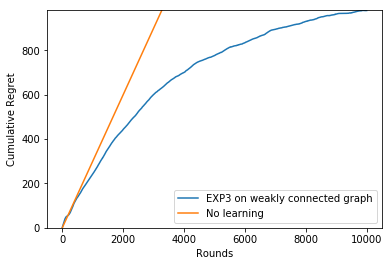

In [124]:
qW2_13,lW2_13 = EXP3Opt(W2_13, list(W2_13.nodes()), n_itr, n_sim, alpha = alphaS2, delta = 4)
regW2_13 = compute_regret(lW2_13, W2_13)
dr2W2_13,laW2_13 = plot_regret(W2_13, [regW2_13], ['EXP3 on weakly connected graph'])

Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:08<00:00,  3.51it/s]


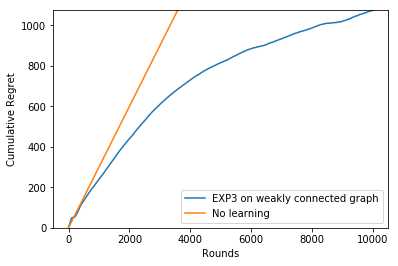

In [125]:
qW2_17,lW2_17 = EXP3Opt(W2_17, list(W2_17.nodes()), n_itr, n_sim, alpha = alphaS2, delta = 5)
regW2_17 = compute_regret(lW2_17, W2_17)
dr2W2_17,laW2_17 = plot_regret(W2_17, [regW2_17], ['EXP3 on weakly connected graph'])

The learning rate depends on $\delta^{\frac{1}{3}}$, which is the case in practice

## Strongly to unobservable

A good example of transition from strongly observable to unobservable graph is the case of the bandit graph when one edge is removed. This implies that one of the vertices is no longer observed neither by himself nor by any other vertex, which implies that not all vertices are observable.

In [63]:
alpha1 = 1
beta1 = 0
n_nodes = 5
S3 = bandit.copy()

/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/proprietaire/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/proprietaire/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  wa

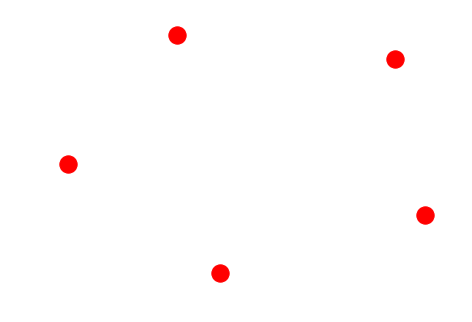

This graph is strongly observable


In [64]:
nx.draw(S3)  # networkx draw()
plt.draw()
plt.show()

n_itr = 20000
n_sim = 30

print("This graph is {}".format(obs_dict[obsGraph.observability_type(S2)]))

alphaS3 = S3.number_of_nodes()

deltaS3 = S3.number_of_nodes()

Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:17<00:00,  1.73it/s]


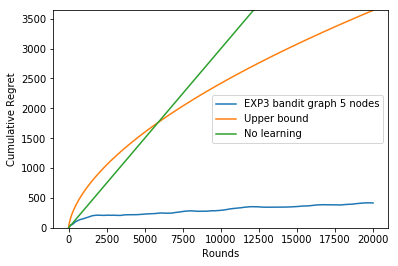

In [70]:
qS3,lS3 = EXP3Opt(S2, list(S2.nodes()), n_itr, n_sim, alpha=alphaS3, delta = deltaS3)
regS3 = compute_regret(lS3, S3)
dr2S3,laS3 = plot_regret(S3, [regS3, upper_bound(S3, len(regS3), alphaS3, deltaS3)], ['EXP3 bandit graph 5 nodes', 'Upper bound'])

Simulating EXP3 on 30 runs:   0%|          | 0/30 [00:00<?, ?it/s]

Edge (4, 4) removed
G is now unobservable
1 edges were removed
This graph is unobservable


Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:16<00:00,  1.78it/s]


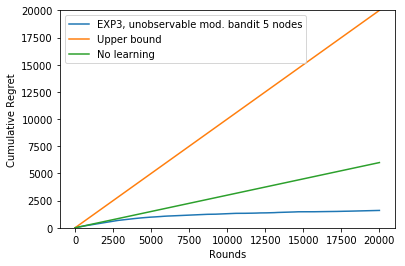

In [71]:
perturbations = [(0,0),(1,1),(2,2),(3,3),(4,4)]

U2_1 = obsGraph.remove_edges(S3, perturbations, 1)
print("This graph is {}".format(obs_dict[obsGraph.observability_type(U2_1)]))

qU2_1,lU2_1 = EXP3Opt(U2_1, list(U2_1.nodes()), n_itr, n_sim, alpha = alphaS3, delta = deltaS3)
regU2_1 = compute_regret(lU2_1, U2_1)
dr2U2,laU2 = plot_regret(U2_1, [regU2_1, upper_bound(U2_1, len(regU2_1), alphaS3, deltaS3)], ['EXP3, unobservable mod. bandit 5 nodes', 'Upper bound'])

Simulating EXP3 on 30 runs:   0%|          | 0/30 [00:00<?, ?it/s]

Edge (4, 4) removed
G is now unobservable
2 edges were removed
This graph is unobservable


Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:16<00:00,  1.81it/s]


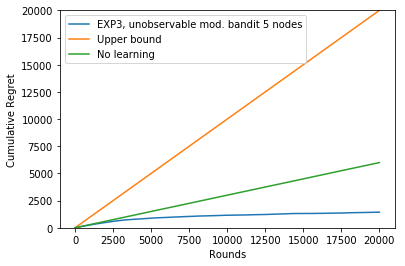

In [72]:
U2_2 = obsGraph.remove_edges(S3, perturbations, 2)
print("This graph is {}".format(obs_dict[obsGraph.observability_type(U2_2)]))

qU2_2,lU2_2 = EXP3Opt(U2_2, list(U2_2.nodes()), n_itr, n_sim, alpha = alphaS3, delta = deltaS3)
regU2_2 = compute_regret(lU2_2, U2_2)
dr2U2,laU2 = plot_regret(U2_2, [regU2_2, upper_bound(U2_2, len(regU2_2), alphaS3, deltaS3)], ['EXP3, unobservable mod. bandit 5 nodes', 'Upper bound'])

Simulating EXP3 on 30 runs:   0%|          | 0/30 [00:00<?, ?it/s]

Edge (4, 4) removed
G is now unobservable
3 edges were removed
This graph is unobservable


Simulating EXP3 on 30 runs: 100%|██████████| 30/30 [00:16<00:00,  1.83it/s]


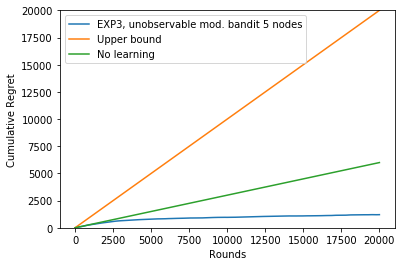

In [73]:
U2_3 = obsGraph.remove_edges(S3, perturbations, 3)
print("This graph is {}".format(obs_dict[obsGraph.observability_type(U2_3)]))

qU2_3,lU2_3 = EXP3Opt(U2_3, list(U2_3.nodes()), n_itr, n_sim, alpha = alphaS3, delta = deltaS3)
regU2_3 = compute_regret(lU2_3, U2_3)
dr2U2,laU2 = plot_regret(U2_3, [regU2_3, upper_bound(U2_3, len(regU2_3), alphaS3, deltaS3)], ['EXP3, unobservable mod. bandit 5 nodes', 'Upper bound'])

## Bibliography

Fox & Pach, Computing the Independence Number of Intersection Graphs, math.mit.edu/~fox/paper-foxj.pdf